In [2]:
import sys
#sys.path.append('C:/Users/Fabian/gempy')
sys.path.insert(1,'/home/fabian/gempy')
import gempy as gp

/home/fabian/gempy/gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')


In [3]:
%matplotlib inline
import pymc
import numpy as np
import math

from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

from operator import itemgetter

from mpl_toolkits.mplot3d import Axes3D

#import vtk
#import evtk

from scipy.interpolate import griddata

In [4]:
import gempy.utils.spill_analysis as sp
import gempy.utils.fault_analysis as fa
import gempy.utils.decision_making as dm

In [5]:
from gempy import posterior_analysis_elisa as pa

In [11]:
#db0 = pymc.database.hdf5.load('./MCm1/trapmodel_lithSIMPLEMC[ 40  60  80 100]_offset150_1000iterations2.hdf5')
#dbname0 = './MCm1/trapmodel_lithSIMPLEMC[ 40  60  80 100]_offset150_1000iterations2.hdf5'
dbname0 = 'trapmodel_lithSIMPLEMCfinal[ 40  60  80 100]_offset150_10000iterations.hdf5'
#db1 = pymc.database.hdf5.load('./input_data/Traces/post_model_150_30-350_30-250_20_1000iter50burn.hdf5')

In [12]:
post = pa.Posterior(dbname0, entropy=False)

In [13]:
vol_trace = post.db.trap_analysis[:][:,0]
ssf_trace = post.db.trap_analysis[:][:,1]
trap_control_trace = post.db.trap_analysis[:][:,2]

/home/fabian/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


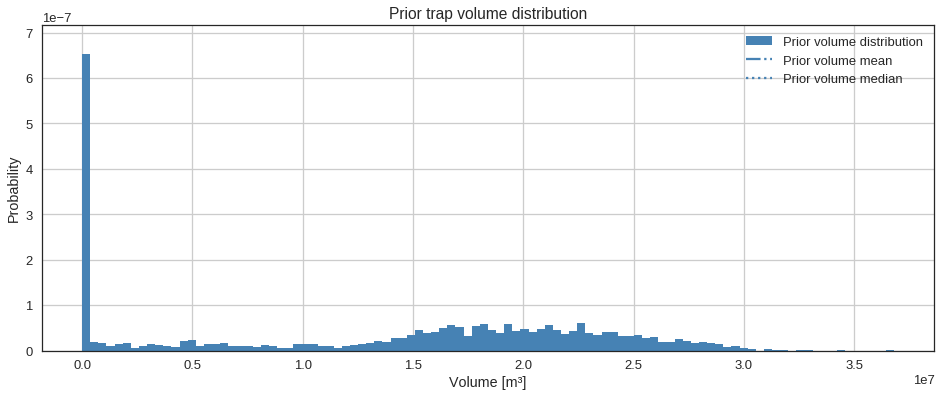

In [14]:
figsize(16, 6)

# Possibly mask away complete failures:
#volumes = max_volume_trace
#mask = volumes == 0
#masked_trace = volumes[~mask]

_hist1 = plt.hist(vol_trace, bins=100, normed=True, 
                  histtype="stepfilled",label="Prior volume distribution", color = "steelblue")
plt.vlines(vol_trace.mean(), 0, 1.1 * np.max(_hist1[0]), label="Prior volume mean", linestyles="-.", color = "steelblue")
plt.vlines(np.median(vol_trace), 0, 1.1 * np.max(_hist1[0]), label="Prior volume median", linestyles=":", color = "steelblue")
plt.title("Prior trap volume distribution")
plt.legend(loc="upper right")
#plt.xticks(np.arange(0, np.max(_hist1[0])+1, np.max(_hist1[0])/10))
plt.grid()
plt.ylim(0, 1.1 * np.max(_hist1[0]))
plt.xlabel("Volume [m³]")
plt.ylabel("Probability");

Bayes action (minimum) at risk r 0.50: 19264000.00 --- expected loss: 8343683.51
Bayes action (minimum) at risk r 0.75: 16000000.00 --- expected loss: 10534557.16
Bayes action (minimum) at risk r 1.00: 10304000.00 --- expected loss: 11929301.50
Bayes action (minimum) at risk r 1.25: 2944000.00 --- expected loss: 11832360.88
Bayes action (minimum) at risk r 1.50: 0.00 --- expected loss: 10925550.89


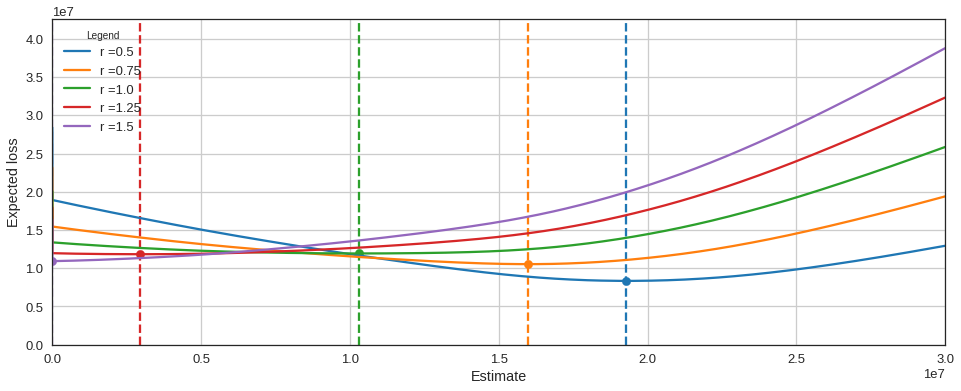

In [15]:
dm.expected_loss_plot(np.arange(0,30000000,100), vol_trace, np.arange(0.5,1.75, 0.25), 'absolute', 1, 1.25, 1.5, 2, verbose=True)

In [16]:
1.1 * np.max(_hist1[0])

7.176588735683311e-07

In [17]:
uniques, counts = np.unique(trap_control_trace, return_counts=True)
counts = np.round((counts/1000)*100)

labels = ('UNCLEAR', 'SPILL POINT', 'LEAK UNDER', 'LEAK OVER', 'STRAT')
trap_base = dict(zip(labels, [0,0,0,0,0]))
trap_controls = dict(zip(labels, counts))

In [18]:
uniques

array([0., 1., 2., 3., 4.])

In [19]:
counts

array([  1., 165.,  80.,  39.,  29.])

In [39]:
ssf_trace

array([3.25      , 3.25      , 3.25      , 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 5.33333333, 5.33333333, 5.33333333, 5.33333333,
       5.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333333,
       4.33333333, 4.33333333, 4.33333333, 4.33333333, 4.33333

In [41]:
vol_trace

array([       0.,        0.,        0.,  5952000.,  5952000.,  5952000.,
       10560000.,  9472000.,  9472000.,  9472000.,  9472000.,  9472000.,
        9472000.,  8192000.,  8192000., 10368000., 10368000., 10368000.,
       10368000., 10368000.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0.,        0.,        0.,        0.,        0.,
              0.,        0., 14336000., 14336000., 14336000., 14272000.,
       14272000., 14272000., 14272000., 14272000., 14272000., 14336000.,
       14272000., 14272000., 17792000., 17792000., 17792000., 13952000.,
       13952000., 14144000., 14080000., 12864000., 12864000., 12864000.,
       12864000., 12864000., 12864000., 12864000., 

In [42]:
trap_control_trace

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 3., 1., 3., 3., 3., 3., 1., 1., 3., 3., 3.,
       3., 3., 1., 1., 1., 1., 3., 1., 1., 1., 3., 3., 3., 3., 1., 1., 1.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [55]:
post.db.thicknesses[:,2][-1]

array([306.75703666])

In [57]:
ssf_trace[-1]

4.75

In [59]:
post.db.trace_names

[['Base_Top_stoch',
  'Metropolis_Base_Top_stoch_adaptive_scale_factor',
  'Metropolis_Res_Top_stoch_adaptive_scale_factor',
  'Metropolis_SSF_likelihood_adaptive_scale_factor',
  'Metropolis_Seal_Top_stoch_adaptive_scale_factor',
  'Metropolis_SecRes_Top_stoch_adaptive_scale_factor',
  'Metropolis_hanging walloffset_unc_adaptive_scale_factor',
  'Metropolis_res_th_likelihood_adaptive_scale_factor',
  'Metropolis_seal_th_likelihood_adaptive_scale_factor',
  'Metropolis_sec_res_th_likelihood_adaptive_scale_factor',
  'Res_Top_stoch',
  'Seal_Top_stoch',
  'SecRes_Top_stoch',
  'deviance',
  'hanging walloffset_unc',
  'thicknesses',
  'trap_analysis',
  'input_data',
  'lith_prob']]

In [73]:
post.db.trace('hanging walloffset_unc')[-1]

-287.52754763253364